<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/01_pytorch_workflow_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. PyTorch Workflow Exercise Template

The following is a template for the PyTorch workflow exercises.

It's only starter code and it's your job to fill in the blanks.

Because of the flexibility of PyTorch, there may be more than one way to answer the question.

Don't worry about trying to be *right* just try writing code that suffices the question.

You can see one form of [solutions on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) (but try the exercises below yourself first!).

In [1]:
# Import necessary libraries
import os
import math
import numpy as np 
import time


import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 


from matplotlib.colors import to_rgba
import seaborn as sns
sns.set()

from tqdm.notebook import tqdm

import torch

In [2]:
# Setup device-agnostic code

## 1. Create a straight line dataset using the linear regression formula (`weight * X + bias`).
  * Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total. 
  * Split the data into 80% training, 20% testing.
  * Plot the training and testing data so it becomes visual.

Your output of the below cell should look something like:
```
Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900])
y: tensor([0.9000, 0.9030, 0.9060, 0.9090, 0.9120, 0.9150, 0.9180, 0.9210, 0.9240,
        0.9270])
```

Of course the numbers in `X` and `y` may be different but ideally they're created using the linear regression formula.

In [3]:
# Create the data parameters
weight = 0.3
bias = 0.9

# Make X and y using linear regression feature

X = torch.arange(0,1,0.01)
y = weight * X + bias

print(f"Number of X samples: {len(X)}")
print(f"Number of y samples: {len(y)}")
print(f"First 10 X & y samples:\nX: {X[:10]}\ny: {y[:10]}")

Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900])
y: tensor([0.9000, 0.9030, 0.9060, 0.9090, 0.9120, 0.9150, 0.9180, 0.9210, 0.9240,
        0.9270])


In [4]:
# Split the data into training and testing

num = torch.randperm(len(X))  

X_shuffl = X[num]
Y_shuffl = y[num]

training_size = int(0.8 * len(X))  # 80% 

X_Train, X_Test = X_shuffl[:training_size], X_shuffl[training_size:]
Y_Train, Y_Test = Y_shuffl[:training_size], Y_shuffl[training_size:]

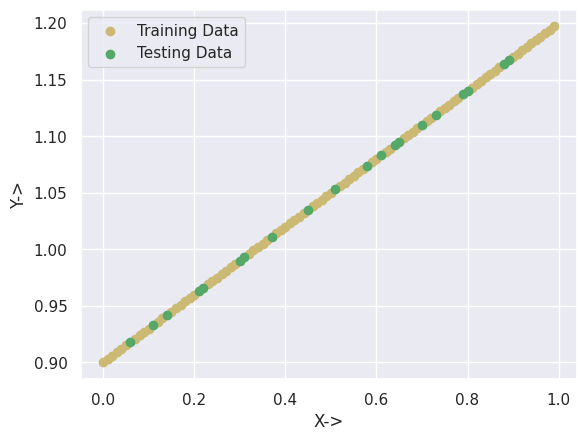

In [5]:
# Plot the training and testing data 

plt.scatter(X_Train, Y_Train, label = "Training Data", color='y')
plt.scatter(X_Test, Y_Test, label = "Testing Data", color= 'g')

plt.xlabel("X->")
plt.ylabel("Y->")

plt.legend()

plt.show()

## 2. Build a PyTorch model by subclassing `nn.Module`. 
  * Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for `weights` and one for `bias`. 
  * Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1. 
  * Once you've constructed the model, make an instance of it and check its `state_dict()`.
  * **Note:** If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.

In [6]:
# Create PyTorch linear regression model by subclassing nn.Module

from torch import nn

class LinearRegression(nn.Module):
    
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.weights = nn.Parameter(torch.randn(1))  
        self.bias = nn.Parameter(torch.randn(1))    

    def forward(self, x):
        return self.weights * x + self.bias

In [7]:
# Instantiate the model and put it to the target device

model = LinearRegression()

print("Model.: ")
for parameter_name, parameter_value in model.state_dict().items():
    print(f"{parameter_name}: {parameter_value}")

Model.: 
weights: tensor([0.0994])
bias: tensor([-1.0735])


## 3. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively. 
  * Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
  * Write a training loop to perform the appropriate training steps for 300 epochs.
  * The training loop should test the model on the test dataset every 20 epochs.

In [8]:
# Create the loss function and optimizer
loss_function = nn.L1Loss()


import torch.optim as optim

optimizer = optim.SGD(model.parameters(), lr=0.01)

In [9]:
epochs = 300

# Send data to target device

for epoch in range(epochs):
    model.train()
    predictions = model(X_Train)
    loss = loss_function(predictions, Y_Train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 20 == 0:
        model.eval()
        with torch.no_grad():
            p_test = model(X_Test)
        test_loss = loss_function(p_test, Y_Test)
        print(f"Epoch: {epoch} | Train loss: {loss:.3f} | Test loss: {test_loss:.3f}")

Epoch: 0 | Train loss: 2.073 | Test loss: 2.061
Epoch: 20 | Train loss: 1.824 | Test loss: 1.812
Epoch: 40 | Train loss: 1.575 | Test loss: 1.562
Epoch: 60 | Train loss: 1.326 | Test loss: 1.313
Epoch: 80 | Train loss: 1.077 | Test loss: 1.064
Epoch: 100 | Train loss: 0.828 | Test loss: 0.815
Epoch: 120 | Train loss: 0.579 | Test loss: 0.566
Epoch: 140 | Train loss: 0.330 | Test loss: 0.316
Epoch: 160 | Train loss: 0.178 | Test loss: 0.157
Epoch: 180 | Train loss: 0.150 | Test loss: 0.128
Epoch: 200 | Train loss: 0.136 | Test loss: 0.119
Epoch: 220 | Train loss: 0.125 | Test loss: 0.110
Epoch: 240 | Train loss: 0.115 | Test loss: 0.102
Epoch: 260 | Train loss: 0.104 | Test loss: 0.093
Epoch: 280 | Train loss: 0.094 | Test loss: 0.083


## 4. Make predictions with the trained model on the test data.
  * Visualize these predictions against the original training and testing data (**note:** you may need to make sure the predictions are *not* on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [10]:
model.eval()

with torch.no_grad():
    predictions = model(X_Test)  

predictions = predictions.numpy()

print(f"True Values.: \n{Y_Test}\n")
print(f"Predictions.: \n{predictions}\n")

True Values.: 
tensor([1.1400, 0.9900, 0.9930, 1.0530, 1.0920, 1.0830, 0.9630, 0.9330, 0.9420,
        1.0110, 1.0950, 1.1670, 1.1640, 1.1190, 1.1100, 1.0350, 0.9660, 1.0740,
        0.9180, 1.1370])

Predictions.: 
[1.2247534  0.9121008  0.91835386 1.0434148  1.1247046  1.1059453
 0.85582334 0.7932929  0.812052   0.9558722  1.1309576  1.2810308
 1.2747778  1.180982   1.1622229  1.0058966  0.8620764  1.0871862
 0.7620276  1.2185004 ]



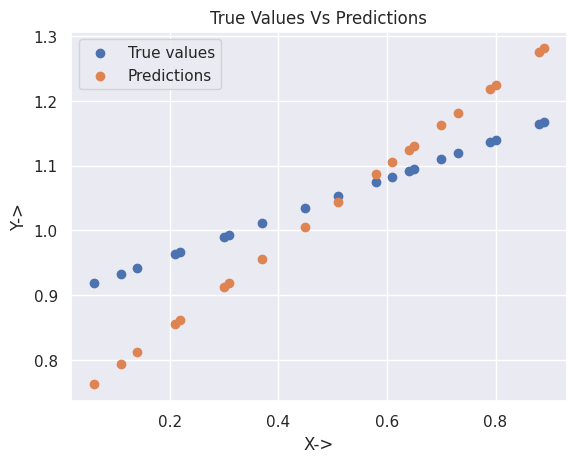

In [11]:
plt.scatter(X_Test.numpy(), Y_Test.numpy(), label = "True values")
plt.scatter(X_Test.numpy(), predictions, label = "Predictions")
plt.xlabel("X->")
plt.ylabel("Y->")
plt.legend()
plt.title("True Values Vs Predictions")
plt.show()

## 5. Save your trained model's `state_dict()` to file.
  * Create a new instance of your model class you made in 2. and load in the `state_dict()` you just saved to it.
  * Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [12]:
from pathlib import Path

models_dir = Path("models")
models_dir.mkdir(parents=True, exist_ok=True)

model_save_path = models_dir / "linear_regression_model.pth"
torch.save(model.state_dict(), model_save_path)

print(f"Model saved to: {model_save_path}")

Model saved to: models/linear_regression_model.pth


In [13]:
load_model = LinearRegression()
load_model.load_state_dict(torch.load(model_save_path))

<All keys matched successfully>

In [14]:
model.eval()
load_model.eval()

with torch.no_grad():
    corepredictions = model(X_Test)

with torch.no_grad():
    loadedpredictions = load_model(X_Test)

print(corepredictions)
print(loadedpredictions)

tensor([1.2248, 0.9121, 0.9184, 1.0434, 1.1247, 1.1059, 0.8558, 0.7933, 0.8121,
        0.9559, 1.1310, 1.2810, 1.2748, 1.1810, 1.1622, 1.0059, 0.8621, 1.0872,
        0.7620, 1.2185])
tensor([1.2248, 0.9121, 0.9184, 1.0434, 1.1247, 1.1059, 0.8558, 0.7933, 0.8121,
        0.9559, 1.1310, 1.2810, 1.2748, 1.1810, 1.1622, 1.0059, 0.8621, 1.0872,
        0.7620, 1.2185])
